In [20]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
import plotly.io as pio
from IPython.display import Image
from sklearn.preprocessing import StandardScaler


In [21]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [22]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from vis_seaborn import VisSeaborn

In [23]:
# LOAD DATA features data
train_features = pd.read_csv("../features/train_features.csv")
test_features = pd.read_csv("../features/test_features.csv")
train_sales = pd.read_csv("../features/train_sales.csv")
train_customers = pd.read_csv("../features/train_customers.csv")


# Modelling


# Loss function


In [31]:
file_handler = FileHandler()
sn = VisSeaborn()

In [32]:
feature_columns = [x for x in train_features]

In [33]:
model = file_handler.read_model("LGBMRegressor-sales-2021-08-01-19_57")
model

2022-05-26 15:55:21,939 — DfHelper — DEBUG — model read as pkl


LGBMRegressor(silent=True)

In [34]:
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Feature Importance': model.feature_importances_})
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
CompetitionDistance,1163
StoreType,243
CompetitionOpen,214
Day,179
DayOfWeek,168
Promo2Open,166
Assortment,166
PromoInterval0,139
Promo2,120


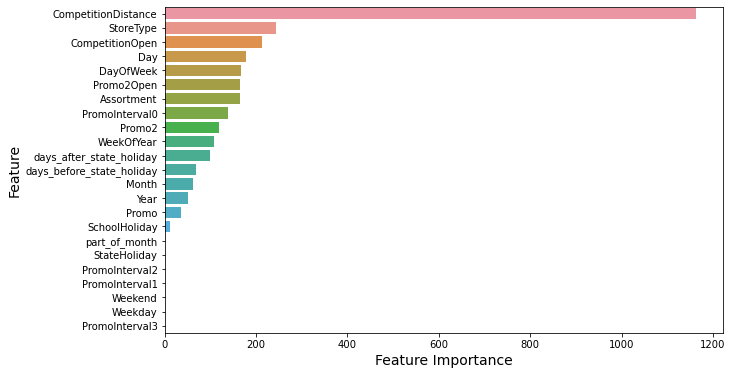

In [35]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Feature Importance", y=feat_imp.index, data=feat_imp)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Feature Importance', fontsize=14)
plt.show()

In [36]:
y_preds = model.predict(train_features) 
prediction_df = train_features.copy()
prediction_df["y_true"] = train_sales
prediction_df["y_pred"] = y_preds 
prediction_df[["y_true", "y_pred"]].head() 

,y_true,y_pred
0,3821,7622.529443
1,10765,7622.529443
2,8498,7622.529443
3,3113,7156.289950
4,14049,6120.825666


<AxesSubplot:xlabel='Day', ylabel='y_true'>

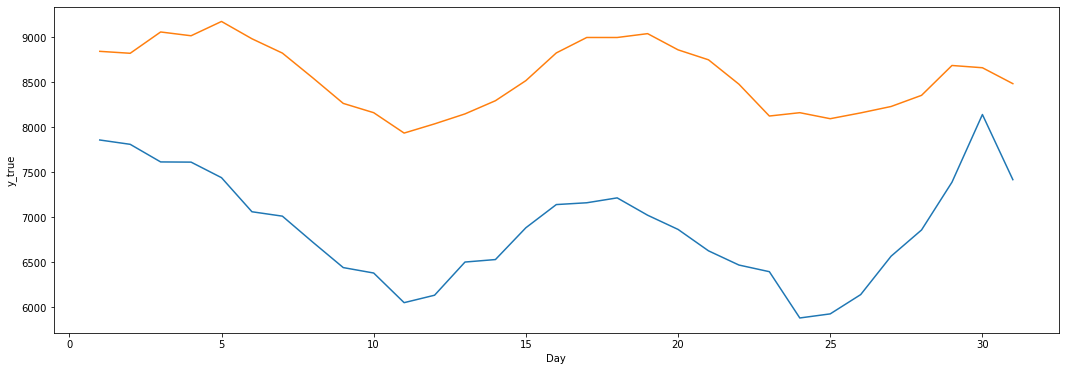

In [37]:
daily_trend = prediction_df.groupby(['Day']).agg({'y_true': 'mean', 'y_pred': 'mean'})
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_trend.index, y=daily_trend["y_true"])
sns.lineplot(x=daily_trend.index, y=daily_trend["y_pred"])

#  Random Forest Regressor

In [38]:
model = file_handler.read_model("RandomForestRegressor-sales-2021-08-01-20:17")
model

2022-05-26 16:12:00,521 — DfHelper — ERROR — model not found
Traceback (most recent call last):
  File "/home/ermi/Desktop/10Academy/week3/scripts/file_handler.py", line 56, in read_model
    model = pickle.load(open(name, "rb"))
FileNotFoundError: [Errno 2] No such file or directory: '../models/RandomForestRegressor-sales-2021-08-01-20:17.pkl'
